In [14]:
import numpy as np
import cv2
from cv2 import dnn_superres
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

shape: (160, 160, 3)


(-0.5, 159.5, 159.5, -0.5)

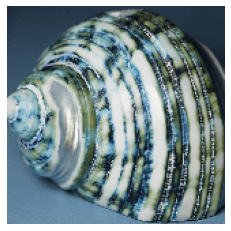

In [35]:
# load the image

image = cv2.imread('image.png')
plt.imshow(image)
print("shape:", image.shape)
plt.axis('off')

## Classical upscaling (2x)

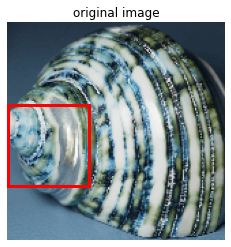

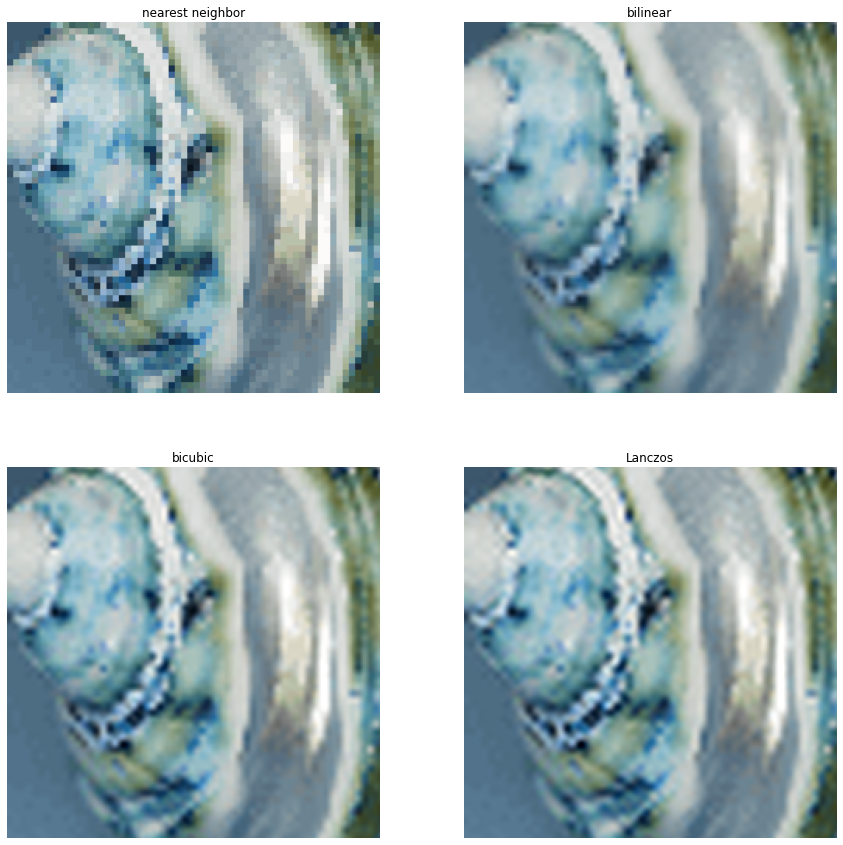

In [51]:
# nearest neighbor interpolation

upscaled_nn = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)

# bilinear interpolation

upscaled_bl = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)

# bicubic interpolation

upscaled_bc = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)

# Lanczos interpolation

upscaled_lc = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_LANCZOS4)

# plot original image showing the cropped region

plt.imshow(image)
plt.gca().add_patch(Rectangle((0,60), 60, 60, linewidth=3, edgecolor='r', facecolor='none'))
plt.title('original image')
plt.axis('off')
plt.savefig('./upscaled_images/original_with_bounding_box.png')
plt.show()

# plot the images in a 2x2 grid

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(upscaled_nn[240:479, 0:240])
plt.title('nearest neighbor')
plt.axis('off')
plt.subplot(222)
plt.imshow(upscaled_bl[240:479, 0:240])
plt.title('bilinear')
plt.axis('off')
plt.subplot(223)
plt.imshow(upscaled_bc[240:479, 0:240])
plt.title('bicubic')
plt.axis('off')
plt.subplot(224)
plt.imshow(upscaled_lc[240:479, 0:240])
plt.title('Lanczos')
plt.axis('off')
plt.savefig('./upscaled_images/upscaled_classical_cropped.png.png')
plt.show()

## Neural Network based upscaling (2x)

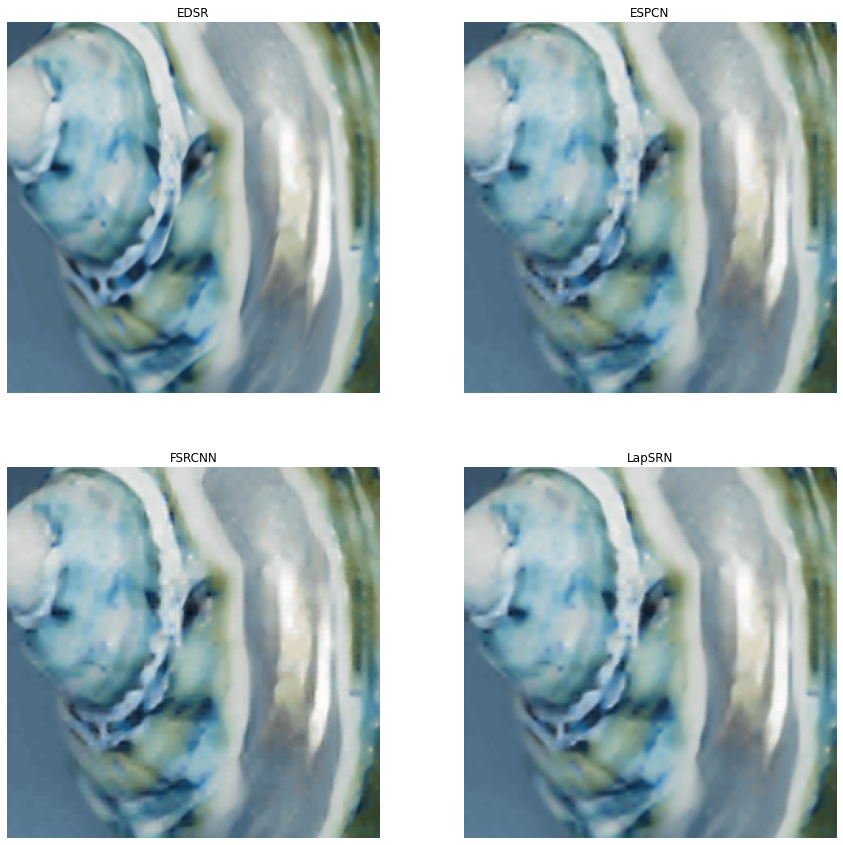

In [50]:
# using OpenCV's super resolution module

# load the model

sr_edsr = dnn_superres.DnnSuperResImpl_create()
sr_espcn = dnn_superres.DnnSuperResImpl_create()
sr_fsrcnn = dnn_superres.DnnSuperResImpl_create()
sr_lapsrn = dnn_superres.DnnSuperResImpl_create()

sr_edsr.readModel('./model_weights/EDSR_x4.pb')
sr_espcn.readModel('./model_weights/ESPCN_x4.pb')
sr_fsrcnn.readModel('./model_weights/FSRCNN_x4.pb')
sr_lapsrn.readModel('./model_weights/LapSRN_x4.pb')

# set the desired model and scale to get correct pre- and post-processing

sr_edsr.setModel("edsr", 4)
sr_espcn.setModel("espcn", 4)
sr_fsrcnn.setModel("fsrcnn", 4)
sr_lapsrn.setModel("lapsrn", 4)

# upscale the image

upscaled_edsr = sr_edsr.upsample(image)
upscaled_espcn = sr_espcn.upsample(image)
upscaled_fsrcnn = sr_fsrcnn.upsample(image)
upscaled_lapsrn = sr_lapsrn.upsample(image)

# plot the images

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(upscaled_edsr[240:479, 0:240])
plt.title('EDSR')
plt.axis('off')
plt.subplot(222)
plt.imshow(upscaled_espcn[240:479, 0:240])
plt.title('ESPCN')
plt.axis('off')
plt.subplot(223)
plt.imshow(upscaled_fsrcnn[240:479, 0:240])
plt.title('FSRCNN')
plt.axis('off')
plt.subplot(224)
plt.imshow(upscaled_lapsrn[240:479, 0:240])
plt.title('LapSRN')
plt.axis('off')
plt.savefig('./upscaled_images/upscaled_neural_net_cropped.png')
plt.show()


## Compare classical and NN-based results

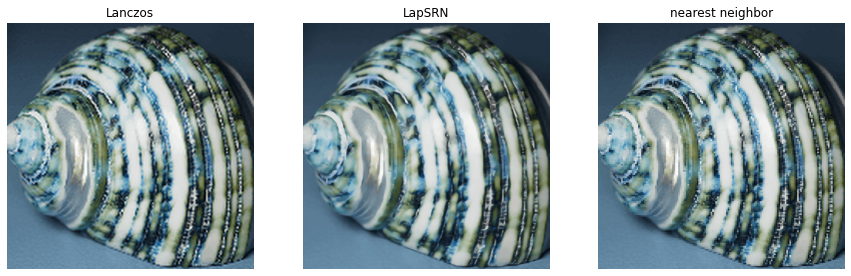

In [52]:
# compare the results of 2 good upscaled images with one poor upscaling

plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(upscaled_lc)
plt.title('Lanczos')
plt.axis('off')
plt.subplot(132)
plt.imshow(upscaled_lapsrn)
plt.title('LapSRN')
plt.axis('off')
plt.subplot(133)
plt.imshow(upscaled_nn)
plt.title('nearest neighbor')
plt.axis('off')
plt.savefig('./upscaled_images/upscaled_images_compared.png', dpi=300)
plt.show()


In [45]:
# save some plots
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(upscaled_edsr)
plt.title('EDSR')
plt.axis('off')
plt.subplot(222)
plt.imshow(upscaled_espcn)
plt.title('ESPCN')
plt.axis('off')
plt.subplot(223)
plt.imshow(upscaled_fsrcnn)
plt.title('FSRCNN')
plt.axis('off')
plt.subplot(224)
plt.imshow(upscaled_lapsrn)
plt.title('LapSRN')
plt.axis('off')
plt.savefig('./upscaled_images/upscaled_images_neural_net.png', dpi=300)
plt.close()

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(upscaled_nn)
plt.title('nearest neighbor')
plt.axis('off')
plt.subplot(222)
plt.imshow(upscaled_bl)
plt.title('bilinear')
plt.axis('off')
plt.subplot(223)
plt.imshow(upscaled_bc)
plt.title('bicubic')
plt.axis('off')
plt.subplot(224)
plt.imshow(upscaled_lc)
plt.title('Lanczos')
plt.axis('off')
plt.savefig('./upscaled_images/upscaled_images_classical.png', dpi=300)
plt.close()